# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats
# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy   




### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
print(cities)

Number of cities in the list: 604
['atafu village', "st. john's", 'west island', 'port-aux-francais', 'grytviken', 'pisco', 'taiohae', 'lihue', 'san cristobal verapaz', 'ahau', 'waitangi', 'luchow', 'port alfred', 'ancud', 'adamstown', 'saratamata', 'bethel', 'khandyga', 'saint-pierre', 'papatowai', 'marsabit', 'la ronge', 'albany', 'port lincoln', 'margaret river', 'mandiana', 'cam ranh', 'ushuaia', 'keflavik', 'mirnyy', 'okha', 'puerto natales', 'ghadamis', 'port elizabeth', 'petropavlovsk-kamchatsky', 'vila do maio', 'broken hill', 'iqaluit', 'sorong', 'lhokseumawe', 'aldan', 'college', 'warrenton', 'port-vila', 'invercargill', 'edinburgh of the seven seas', 'mata-utu', 'rosarito', 'hermanus', 'thompson', 'vilyuchinsk', 'wailua homesteads', 'mejit', 'virginia', 'cannonvale', 'haiku-pauwela', 'uturoa', 'itoman', 'gaiman', 'yorkton', 'fuerte olimpo', 'city of balikpapan', 'bilibino', 'la libertad', 'tazacorte', 'laojunmiao', 'bumba', 'manado', 'whitehorse', 'zheshart', 'lobujya', 'ham

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units=metric&q={city}"

    
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()


        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat'] 
               
    
        city_lng = city_weather['coord']['lon']
        city_max_temp =city_weather['main']['temp_max'] 
        city_humidity =city_weather['main']['humidity']
        city_clouds =city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed'] 
        city_country =city_weather['sys']['country']
        city_date_unformatted = city_weather['dt']
        city_date_struct = time.localtime(city_date_unformatted)
        city_date = time.strftime('%Y-%m-%d', city_date_struct)

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | atafu village
Processing Record 2 of Set 1 | st. john's
Processing Record 3 of Set 1 | west island
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | grytviken
Processing Record 6 of Set 1 | pisco
Processing Record 7 of Set 1 | taiohae
City not found. Skipping...
Processing Record 8 of Set 1 | lihue
Processing Record 9 of Set 1 | san cristobal verapaz
Processing Record 10 of Set 1 | ahau
City not found. Skipping...
Processing Record 11 of Set 1 | waitangi
Processing Record 12 of Set 1 | luchow
Processing Record 13 of Set 1 | port alfred
Processing Record 14 of Set 1 | ancud
Processing Record 15 of Set 1 | adamstown
Processing Record 16 of Set 1 | saratamata
City not found. Skipping...
Processing Record 17 of Set 1 | bethel
Processing Record 18 of Set 1 | khandyga
Processing Record 19 of Set 1 | saint-pierre
Processing Record 20 of Set 1 | papatowai
Processing Record 2

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count() 
print(city_data_df)

                  City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
0        atafu village  -8.5421 -172.5159     29.21        75          43   
1           st. john's  47.5649  -52.7093     11.66        95          20   
2          west island -12.1568   96.8225     24.99        94          75   
3    port-aux-francais -49.3500   70.2167      2.87        70          58   
4            grytviken -54.2811  -36.5092     -4.30        85          56   
..                 ...      ...       ...       ...       ...         ...   
570            dong ha  16.8163  107.1003     35.70        45         100   
571          malampaka  -3.1333   33.5333     19.81        64          81   
572       arkhangel'sk  64.5401   40.5433     15.06        77           0   
573     guerrero negro  27.9769 -114.0611     16.44        87          46   
574          nantucket  41.2835  -70.0995     16.67        88           0   

     Wind Speed Country        Date  
0          5.34      TK  2024-06-10  

In [5]:
# Display sample data
city_data_df.head() 


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,atafu village,-8.5421,-172.5159,29.21,75,43,5.34,TK,2024-06-10
1,st. john's,47.5649,-52.7093,11.66,95,20,8.23,CA,2024-06-10
2,west island,-12.1568,96.8225,24.99,94,75,6.69,CC,2024-06-10
3,port-aux-francais,-49.3500,70.2167,2.87,70,58,14.12,TF,2024-06-10
4,grytviken,-54.2811,-36.5092,-4.30,85,56,5.19,GS,2024-06-10


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,atafu village,-8.5421,-172.5159,29.21,75,43,5.34,TK,2024-06-10
1,st. john's,47.5649,-52.7093,11.66,95,20,8.23,CA,2024-06-10
2,west island,-12.1568,96.8225,24.99,94,75,6.69,CC,2024-06-10
3,port-aux-francais,-49.3500,70.2167,2.87,70,58,14.12,TF,2024-06-10
4,grytviken,-54.2811,-36.5092,-4.30,85,56,5.19,GS,2024-06-10


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

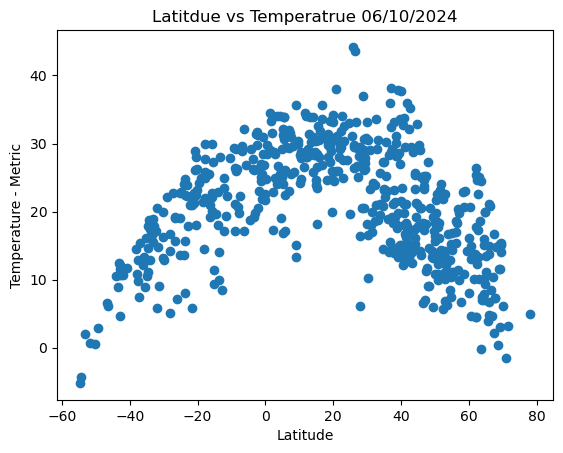

In [8]:
# Build scatter plot for latitude vs. temperature
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
# Incorporate the other graph properties
plt.scatter(x_values,y_values) 
plt.title( 'Latitdue vs Temperatrue 06/10/2024')
plt.xlabel('Latitude' )
plt.ylabel('Temperature - Metric')
# Save the figure
plt.savefig("output_data/Fig1.png")
# Show plot
plt.show()

#### Latitude Vs. Humidity

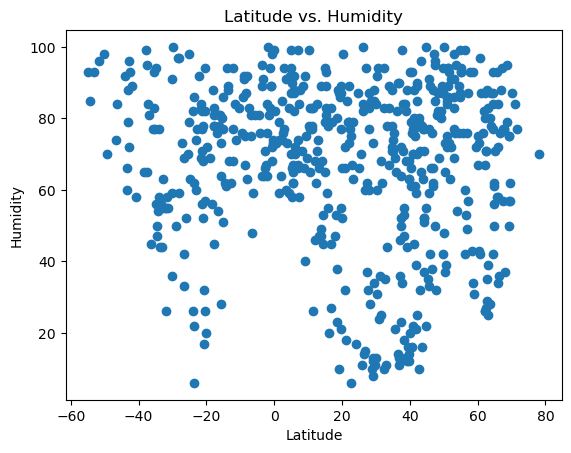

In [9]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat'] 
y_values = city_data_df['Humidity'] 

# Incorporate the other graph properties 
plt.scatter(x_values,y_values) 
plt.title('Latitude vs. Humidity') 
plt.xlabel('Latitude')  
plt.ylabel('Humidity')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

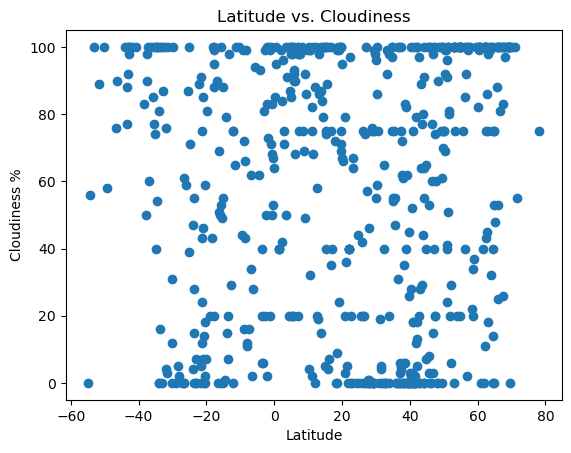

In [10]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat'] 
y_values = city_data_df['Cloudiness']

# Incorporate the other graph properties
plt.scatter(x_values,y_values) 
plt.title('Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

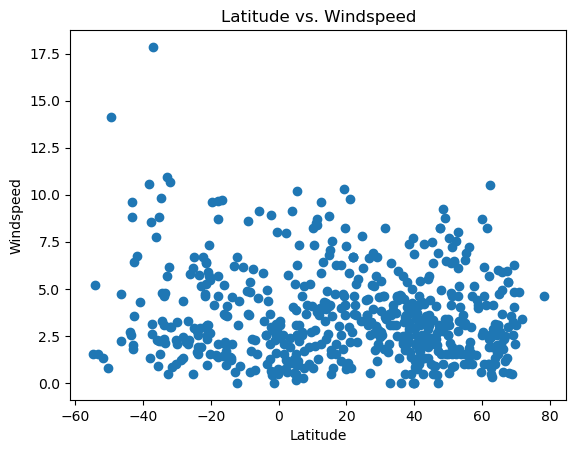

In [11]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat'] 
y_values = city_data_df['Wind Speed']
# Incorporate the other graph properties
plt.scatter(x_values,y_values) 
plt.title('Latitude vs. Windspeed')
plt.xlabel('Latitude')
plt.ylabel('Windspeed')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def create_linear_regression(x, y, x_titles, y_titles):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y) 
    print("r-value  : ", r_value, "\np-value  : ", p_value, "\nstd-error: ", std_err)
    regress_values = x * slope + intercept
    #print(regress_values)
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(line_eq)
# Create Plot
    plt.scatter(x,y, edgecolors='black')
    plt.title(f"{x_titles} vs. {y_titles} 06/10-2024") 
    plt.plot(x,regress_values,"r-")
# Label plot and annotate the line equation
    plt.xlabel(x_titles)
    plt.ylabel(y_titles)
    plt.grid(linestyle='--', alpha=0.7)
    plt.gca().set_axisbelow(True)
    plt.annotate(line_eq,(20,5),fontsize=15,color="red")
# Show plot
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,st. john's,47.5649,-52.7093,11.66,95,20,8.23,CA,2024-06-10
6,lihue,21.9789,-159.3672,29.58,73,40,6.69,US,2024-06-10
7,san cristobal verapaz,15.3833,-90.4000,18.20,93,100,0.48,GT,2024-06-10
9,luchow,52.9667,11.1500,11.17,91,100,6.13,DE,2024-06-10
13,bethel,41.3712,-73.4140,16.20,80,0,1.13,US,2024-06-10


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,atafu village,-8.5421,-172.5159,29.21,75,43,5.34,TK,2024-06-10
2,west island,-12.1568,96.8225,24.99,94,75,6.69,CC,2024-06-10
3,port-aux-francais,-49.3500,70.2167,2.87,70,58,14.12,TF,2024-06-10
4,grytviken,-54.2811,-36.5092,-4.30,85,56,5.19,GS,2024-06-10
5,pisco,-13.7000,-76.2167,14.03,88,20,2.06,PE,2024-06-10


###  Temperature vs. Latitude Linear Regression Plot

r-value  :  -0.6820793244468736 
p-value  :  2.027728520274386e-57 
std-error:  0.015982575691276975
y = -0.3x + 32.67


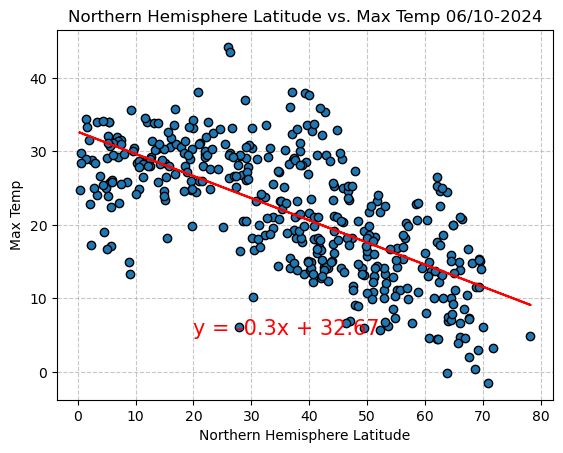

In [16]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
create_linear_regression(x_values, y_values, 'Northern Hemisphere Latitude', 'Max Temp' ) 

r-value  :  0.763759329215869 
p-value  :  8.386359133453211e-33 
std-error:  0.02788528103466181
y = 0.42x + 27.97


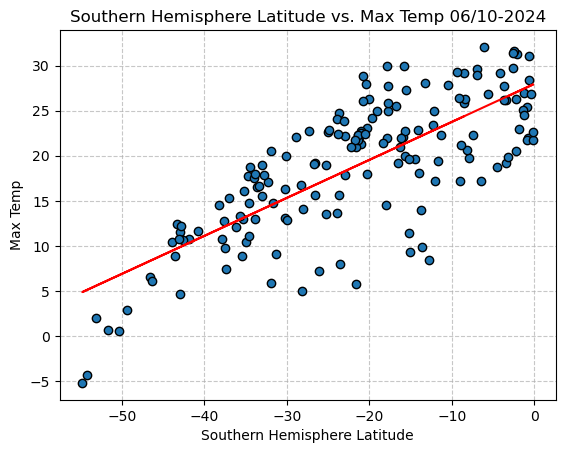

In [20]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df ['Max Temp']  
create_linear_regression(x_values, y_values, 'Southern Hemisphere Latitude', 'Max Temp' ) 

**Discussion about the linear relationship:** 
The graph indicates a strong correlation between temperature change and distance from the equator, with opposite trends in the Northern and Southern Hemispheres. In the Northern Hemisphere, there's a moderate negative correlation (r = -0.68), suggesting that as you move away from the equator towards the poles, temperatures decrease. Conversely, in the Southern Hemisphere, there's a strong positive correlation (r = 0.76), indicating that temperatures tend to increase as you move away from the equator towards the poles. Overall, these findings suggest a significant relationship between latitude and temperature variation, with distinct patterns in each hemisphere.

### Humidity vs. Latitude Linear Regression Plot

r-value  :  -0.010609323425379269 
p-value  :  0.8304124723467313 
std-error:  0.06089319318684385
y = -0.01x + 66.21


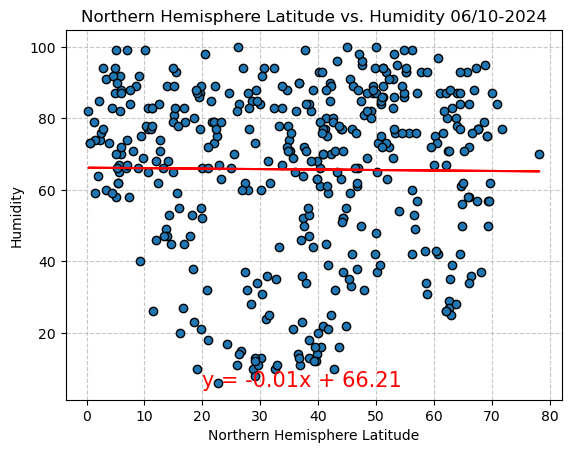

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
create_linear_regression(x_values, y_values, 'Northern Hemisphere Latitude', 'Humidity' ) 

r-value  :  0.0704925874187943 
p-value  :  0.3682640832922348 
std-error:  0.10851094504597576
y = 0.1x + 73.66


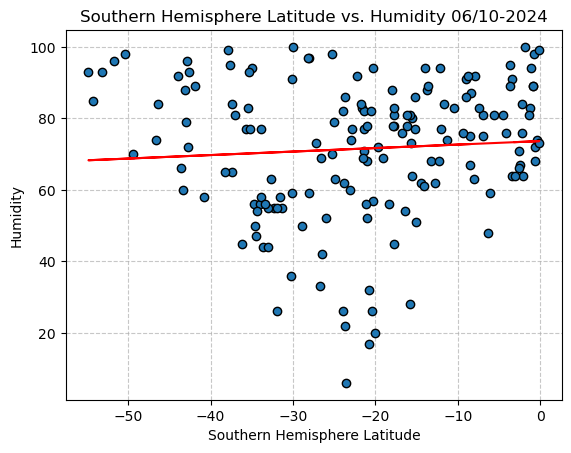

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
create_linear_regression(x_values, y_values, 'Southern Hemisphere Latitude', 'Humidity' ) 

**Discussion about the linear relationship:** The summary between the r-values for the Southern Hemisphere (r = 0.070) and the Northern Hemisphere (r = -0.011) suggests weak or negative correlations between temperature change and the distance from the equator in both hemispheres. In the Southern Hemisphere, the positive correlation indicates a small tendency for temperatures to increase as one moves away from the equator, but the strength of this relationship is minimal. 
Similarly, in the Northern Hemisphere, the negative correlation implies a slight decrease in temperatures with increasing distance from the equator, but again, the correlation is very weak. Overall, these findings suggest that latitude may have only a minor influence on temperature change in both hemispheres.

### Cloudiness vs. Latitude Linear Regression Plot

r-value  :  0.03480458825801406 
p-value  :  0.4821800617946592 
std-error:  0.09930597964395606
y = 0.07x + 55.2


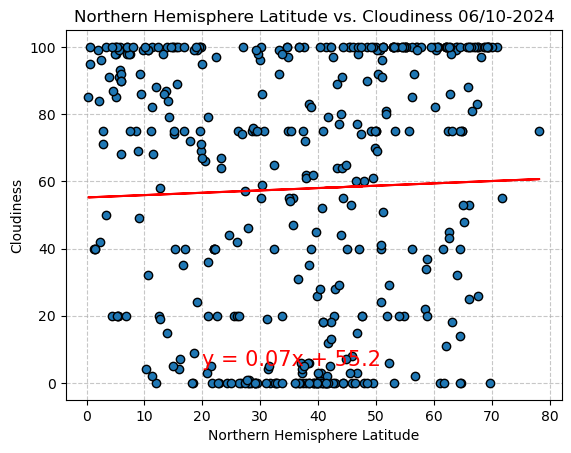

In [23]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
create_linear_regression(x_values, y_values, 'Northern Hemisphere Latitude', 'Cloudiness' ) 

r-value  :  -0.15757872683609414 
p-value  :  0.04323897630971132 
std-error:  0.2126585218405625
y = -0.43x + 44.69


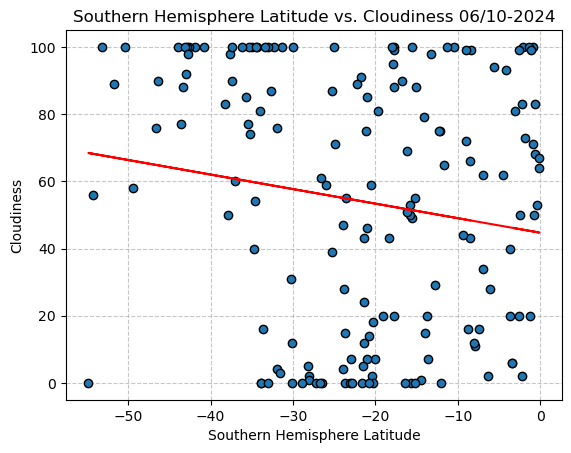

In [24]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
create_linear_regression(x_values, y_values, 'Southern Hemisphere Latitude', 'Cloudiness' ) 

**Discussion about the linear relationship:** The linear relationship between temperature change and distance from the equator is weakly negative in the Southern Hemisphere (r = -0.158) and very weakly positive in the Northern Hemisphere (r = 0.035).

In the Southern Hemisphere, the negative correlation suggests that as you move away from the equator towards the poles, temperatures tend to decrease slightly, albeit not very strongly. Conversely, in the Northern Hemisphere, there's a very slight positive correlation, indicating a minor tendency for temperatures to increase as you move away from the equator.

However, it's important to note that in both cases, the strength of the linear relationship is quite weak, suggesting that latitude might not be a significant predictor of temperature change in these regions.


### Wind Speed vs. Latitude Linear Regression Plot

r-value  :  -0.07621449495395612 
p-value  :  0.12337617702084298 
std-error:  0.005576029944387382
y = -0.01x + 3.79


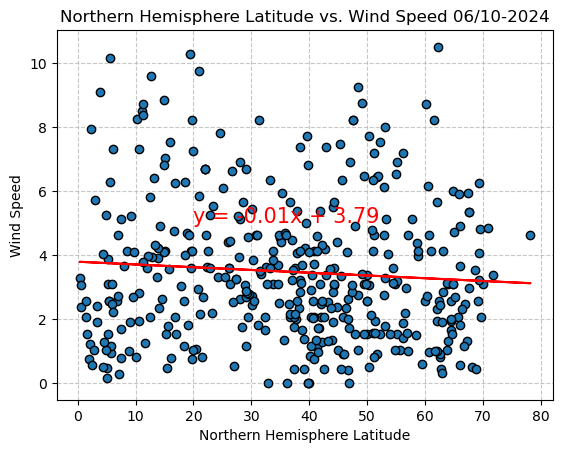

In [25]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
create_linear_regression(x_values, y_values, 'Northern Hemisphere Latitude', 'Wind Speed' ) 

r-value  :  -0.1710088351554741 
p-value  :  0.02808105559736404 
std-error:  0.01624598405084111
y = -0.04x + 3.07


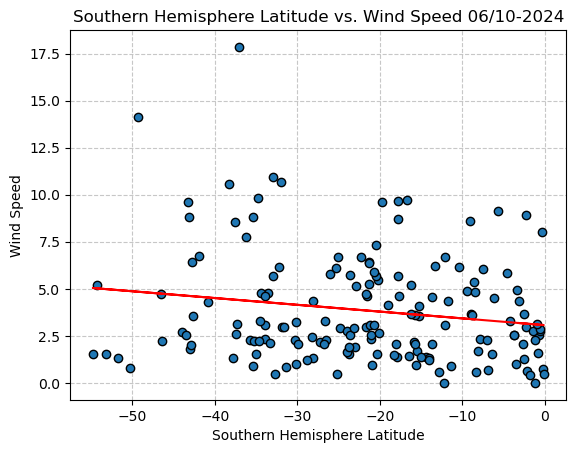

In [26]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
create_linear_regression(x_values, y_values, 'Southern Hemisphere Latitude', 'Wind Speed' ) 

**Discussion about the linear relationship:** The linear relationship between temperature change and distance from the equator is moderately negative in the Northern Hemisphere (r = -0.076) and slightly stronger in the Southern Hemisphere (r = -0.171).

In the Northern Hemisphere, the negative correlation suggests that as you move away from the equator towards the poles, temperatures tend to decrease moderately.

In contrast, the Southern Hemisphere exhibits a slightly stronger negative correlation, indicating that as you move away from the equator towards the poles, temperatures tend to decrease more noticeably.

Overall, both hemispheres show a negative relationship between latitude and temperature change, but the Southern Hemisphere demonstrates a slightly stronger correlation compared to the Northern Hemisphere.
